In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
node_locs = np.genfromtxt('problem3/node_locs.csv', delimiter=',', skip_header=1)
conn = np.genfromtxt('problem3/connectivity.csv', delimiter=',', skip_header=1)
num_nodes = len(node_locs)
num_elems = len(conn)

In [ ]:
def plot_line(ax, c, idx, *args, **kwargs):
    nodes = c[idx]
    x = node_locs[nodes,0]
    y = node_locs[nodes,1]
    ax.plot(x, y, *args, **kwargs)

In [36]:
def plot_deformation(ax, amp):
    for elem in range(len(conn)):
        c = np.array([int(i - 1) for i in conn[elem]], dtype=int)
        for idx in [(0, 1), (1, 2), (2, 0)]:
            i = np.array(idx, dtype=int)
            nodes = c[i]
            x0 = node_locs[nodes, 0]
            y0 = node_locs[nodes, 1]
            ax.plot(x0, y0, 'k--')
            ux = Unodal[nodes, 0]
            uy = Unodal[nodes, 1]
            x = x0 + ux*amp
            y = y0 + uy*amp
            ax.plot(x, y, 'r')

In [41]:
Unodal = np.genfromtxt('problem3/Unodal.out', delimiter=',')
Uelem = np.genfromtxt('problem3/Uelem.out', delimiter=',')
S = np.genfromtxt('problem3/S.out', delimiter=',')

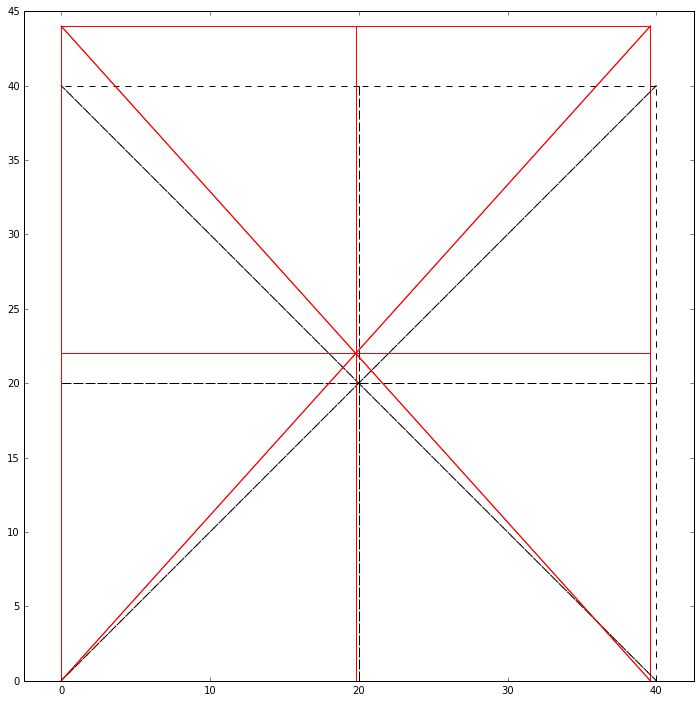

In [43]:
fig, ax = plt.subplots(figsize=(12, 12))

plot_deformation(ax, 1000)
    
# ax.set_xlim(-0.5, 40.5)
# ax.set_ylim(-0.5, 40.5)
ax.set_aspect('equal', 'datalim')

# Write tables

In [52]:
def mk(vals, fmt):
    return ' & '.join([fmt % v for v in vals])

In [84]:
tablehead = r'''\begin{tabular}{@{} r cc c ccc @{}}
    \toprule
     & \multicolumn{2}{c}{Displacements (cm)} & \phantom{a} & \multicolumn{3}{c}{Stresses (N/cm$^2$)}\\
    \cmidrule{2-3} \cmidrule{5-7}
    Element & $u_x$ & $u_y$ & & $\sigma_{xx}$ & $\sigma_{yy}$ & $\sigma_{xy}$ \\
    \midrule
'''
tablefoot = r'''
    \bottomrule
\end{tabular}'''
lines = []
FMT = '%.3g'
for elem in range(num_elems):
    disps = Uelem[elem]
    stresses = S[elem]
    line = ' & '.join(['%d' % (elem+1), mk(disps, '%.2e'), '', mk(stresses, FMT)]) + r' \\'
    lines.append(line)

body = '\n'.join(lines)
table = '\n'.join([tablehead, body, tablefoot])
open('tex/elem.tex', 'w').write(table)

In [86]:
tablehead = r'''\begin{tabular}{@{} r cc c ccc @{}}
    \toprule
     & \multicolumn{2}{c}{Displacements (cm)}\\
    \cmidrule{2-3}
    Node & $u_x$ & $u_y$\\
    \midrule
'''
tablefoot = r'''
    \bottomrule
\end{tabular}'''
lines = []
FMT = '%.3g'
fixed_nodes = [i - 1 for i in [ 3, 4, 5, 5, 6, 7 ]];
fixed_dims = [i - 1 for i in [ 1, 1, 1, 2, 2, 2, ]];
for node in range(num_nodes):
    disps = Unodal[node]
    line = ' & '.join(['%d' % (node+1), mk(disps, '%.1e')])
    lines.append(line)

for node, dim in zip(fixed_nodes, fixed_dims):
    line = lines[node]
    vals = line.split(' & ')
    vals[dim + 1] = r'\textbf{0}'# % vals[dim + 1]
    line = ' & '.join(vals)
    lines[node] = line
    
body = '\n'.join([l + r'\\' for l in lines])
table = '\n'.join([tablehead, body, tablefoot])
print table
open('tex/nodal.tex', 'w').write(table)

\begin{tabular}{@{} r cc c ccc @{}}
    \toprule
     & \multicolumn{2}{c}{Displacements (cm)}\\
    \cmidrule{2-3}
    Node & $u_x$ & $u_y$\\
    \midrule

1 & -4.00e-04 & 4.00e-03\\
2 & -2.00e-04 & 4.00e-03\\
3 & \textbf{0} & 4.00e-03\\
4 & \textbf{0} & 2.00e-03\\
5 & \textbf{0} & \textbf{0}\\
6 & -2.00e-04 & \textbf{0}\\
7 & -4.00e-04 & \textbf{0}\\
8 & -4.00e-04 & 2.00e-03\\
9 & -2.00e-04 & 2.00e-03\\

    \bottomrule
\end{tabular}
